In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
from torch.utils.data import Dataset
import torch
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision
import tqdm
import cv2

# 二値化

In [ ]:

train_data_dir = 'drive/MyDrive/data/train'
valid_data_dir = 'drive/MyDrive/data/validation'

listofcats = os.listdir(train_data_dir)
print(listofcats)

threshoud = 150

for cat in listofcats:
  train_dir_path = glob.glob(train_data_dir +'/'+ cat + '/*.png') 
  valid_dir_path = glob.glob(valid_data_dir +'/'+ cat + '/*.png') 
  for i,(train,valid) in tqdm.tqdm(enumerate(zip(train_dir_path,valid_dir_path)),total=len(train_dir_path)):
    train_img = cv2.imread(train)
    ret, train_thresh = cv2.threshold(train_img, threshoud, 255, cv2.THRESH_BINARY)
    valid_img = cv2.imread(valid)
    ret, valid_thresh = cv2.threshold(valid_img, threshoud, 255, cv2.THRESH_BINARY)
    os.makedirs('drive/MyDrive/dataset2/train' + '/' + cat, exist_ok=True)
    store_train = 'drive/MyDrive/dataset2/train' + '/' + cat
    cv2.imwrite(store_train + '/' + str(i) + '.png',train_thresh)
    os.makedirs('drive/MyDrive/dataset2/valid' + '/' + cat, exist_ok=True)
    store_valid = 'drive/MyDrive/dataset2/valid' + '/' + cat
    cv2.imwrite(store_valid + '/' + str(i) + '.png',valid_thresh)



  2%|▎         | 7/280 [00:00<00:04, 68.13it/s]

['す', 'は', 'こ', 'ね', 'か', 'あ', 'ふ', 'ろ', 'ゆ', 'て', '濁点', 'ら', 'せ', 'そ', 'や', 'つ', 'た', 'ぬ', 'う', 'も', 'み', 'を', 'お', 'れ', 'よ', 'ほ', 'る', '丸', 'き', 'な', 'ち', 'ひ', 'ま', 'し', 'へ', 'の', 'と', 'り', 'い', 'え', 'ん', 'に', 'め', 'け', 'さ', 'む', 'わ', 'く']


 25%|██▌       | 70/280 [00:01<00:04, 45.47it/s]


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


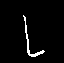

In [ ]:
train_data_dir = 'drive/MyDrive/dataset2/train'
valid_data_dir = 'drive/MyDrive/dataset2/validation'
listofcats = os.listdir(train_data_dir)
from google.colab.patches import cv2_imshow

for cat in listofcats:
  train_dir_path = glob.glob(train_data_dir +'/'+ cat + '/*.png') 
  valid_dir_path = glob.glob(valid_data_dir +'/'+ cat + '/*.png') 
  for train,valid in zip(train_dir_path,valid_data_dir):
    img = cv2.imread(train)
    print(img)
    cv2_imshow(img)
    break
  break

In [ ]:
transform_train = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

transform_valid = transforms.Compose([
     transforms.ToTensor(),
     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

train_data_dir = 'drive/MyDrive/dataset2/train'
valid_data_dir = 'drive/MyDrive/dataset2/valid'

# training set
trainset = torchvision.datasets.ImageFolder(train_data_dir, transform=transform_train)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True)
# validation set
validset = torchvision.datasets.ImageFolder(valid_data_dir, transform=transform_valid)
valid_loader = torch.utils.data.DataLoader(validset, batch_size=8, shuffle=False)

"""# Network 定義"""

#net = models.vgg16(pretrained=False)
net = models.resnet18(pretrained=False)
#4class分類
net.fc = nn.Linear(512,48)

device=torch.device('cuda')
net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

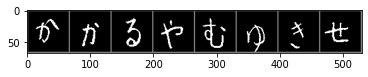

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch.utils.data as data


def imshow(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 訓練データをランダムに取得
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images[0])
# 画像の表示
imshow(torchvision.utils.make_grid(images))
# ラベルの表示
#print(' '.join('%5s' % labels[j] for j in range(48)))

  0%|          | 0/420 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 420/420 [00:09<00:00, 43.12it/s]


Epoch [1/10], loss: 0.3127 train_loss: 0.3127, train_acc: 0.3789


  0%|          | 0/420 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.3127 val_loss: 0.1275, val_acc: 0.7607
Validation loss decreased (inf --> 0.127518).  Saving model ...


100%|██████████| 420/420 [00:09<00:00, 43.44it/s]


Epoch [2/10], loss: 0.0908 train_loss: 0.0908, train_acc: 0.8381


  0%|          | 0/420 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.0908 val_loss: 0.0506, val_acc: 0.9048
Validation loss decreased (0.127518 --> 0.050582).  Saving model ...


100%|██████████| 420/420 [00:09<00:00, 43.75it/s]


Epoch [3/10], loss: 0.0346 train_loss: 0.0346, train_acc: 0.9458


  0%|          | 0/420 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.0346 val_loss: 0.0324, val_acc: 0.9366
Validation loss decreased (0.050582 --> 0.032427).  Saving model ...


100%|██████████| 420/420 [00:10<00:00, 39.01it/s]


Epoch [4/10], loss: 0.0175 train_loss: 0.0175, train_acc: 0.9777


  0%|          | 0/420 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.0175 val_loss: 0.0268, val_acc: 0.9437
Validation loss decreased (0.032427 --> 0.026837).  Saving model ...


100%|██████████| 420/420 [00:09<00:00, 44.17it/s]


Epoch [5/10], loss: 0.0089 train_loss: 0.0089, train_acc: 0.9946


  0%|          | 0/420 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.0089 val_loss: 0.0205, val_acc: 0.9551
Validation loss decreased (0.026837 --> 0.020507).  Saving model ...


100%|██████████| 420/420 [00:10<00:00, 38.52it/s]


Epoch [6/10], loss: 0.0063 train_loss: 0.0063, train_acc: 0.9970


  1%|          | 5/420 [00:00<00:09, 42.31it/s]

Epoch [6/10], loss: 0.0063 val_loss: 0.0205, val_acc: 0.9565
EarlyStopping counter: 1 out of 30


100%|██████████| 420/420 [00:09<00:00, 43.65it/s]


Epoch [7/10], loss: 0.0039 train_loss: 0.0039, train_acc: 0.9997


  0%|          | 0/420 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.0039 val_loss: 0.0185, val_acc: 0.9577
Validation loss decreased (0.020507 --> 0.018535).  Saving model ...


100%|██████████| 420/420 [00:09<00:00, 44.27it/s]


Epoch [8/10], loss: 0.0033 train_loss: 0.0033, train_acc: 0.9970


  0%|          | 0/420 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.0033 val_loss: 0.0169, val_acc: 0.9625
Validation loss decreased (0.018535 --> 0.016877).  Saving model ...


100%|██████████| 420/420 [00:09<00:00, 43.45it/s]


Epoch [9/10], loss: 0.0024 train_loss: 0.0024, train_acc: 0.9997


  1%|          | 4/420 [00:00<00:12, 34.37it/s]

Epoch [9/10], loss: 0.0024 val_loss: 0.0176, val_acc: 0.9610
EarlyStopping counter: 1 out of 30


100%|██████████| 420/420 [00:09<00:00, 43.99it/s]


Epoch [10/10], loss: 0.0022 train_loss: 0.0022, train_acc: 0.9997
Epoch [10/10], loss: 0.0022 val_loss: 0.0163, val_acc: 0.9622
Validation loss decreased (0.016877 --> 0.016316).  Saving model ...


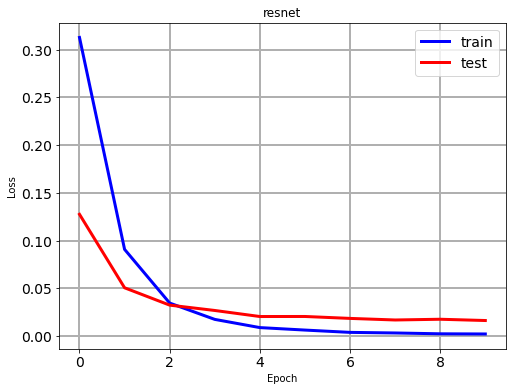

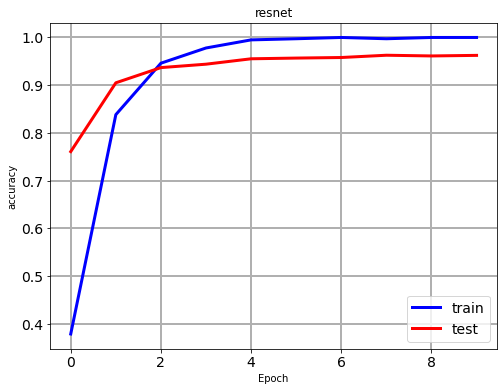

0.9625


In [ ]:
class EarlyStopping:

    def __init__(self, patience=5, verbose=False, path='checkpoint_model.pth'):

        self.patience = patience    #設定ストップカウンタ
        self.verbose = verbose      #表示の有無
        self.counter = 0            #現在のカウンタ値
        self.best_score = None      #ベストスコア
        self.early_stop = False     #ストップフラグ
        self.val_loss_min = np.Inf   #前回のベストスコア記憶用
        self.path = path             #ベストモデル格納path

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:  #1Epoch目の処理
            self.best_score = score   #1Epoch目はそのままベストスコアとして記録する
            self.checkpoint(val_loss, model)  #記録後にモデルを保存してスコア表示する
        elif score < self.best_score:  # ベストスコアを更新できなかった場合
            self.counter += 1   #ストップカウンタを+1
            if self.verbose:  #表示を有効にした場合は経過を表示
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')  #現在のカウンタを表示する 
            if self.counter >= self.patience:  #設定カウントを上回ったらストップフラグをTrueに変更
                self.early_stop = True
        else:  #ベストスコアを更新した場合
            self.best_score = score  #ベストスコアを上書き
            self.checkpoint(val_loss, model)  #モデルを保存してスコア表示
            self.counter = 0  #ストップカウンタリセット

    def checkpoint(self, val_loss, model):
        if self.verbose:  #表示を有効にした場合は、前回のベストスコアからどれだけ更新したか？を表示
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.to('cpu').state_dict(), self.path)  #ベストモデルを指定したpathに保存
        self.val_loss_min = val_loss  #その時のlossを記録する

#loss,accuracyを格納
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

nb_epoch =10
early_stopping = EarlyStopping(patience=30, verbose=True,path='drive/MyDrive/weight/ocr_th.pth')
for epoch in range(nb_epoch):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0

    #train Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same
    net.train()
    for i, (data, labels) in enumerate(tqdm.tqdm(train_loader)):
      
      
      data, labels = data.to(device), labels.to(device)

      optimizer.zero_grad()
      net.cuda()
      outputs = net(data)
      loss = criterion(outputs, labels)
      train_loss += loss.item()
      train_acc += (outputs.max(1)[1] == labels).sum().item()
      loss.backward()
      optimizer.step()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)

    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    print ('Epoch [{}/{}], loss: {loss:.4f} train_loss: {train_loss:.4f}, train_acc: {train_acc:.4f}' 
                   .format(epoch+1, nb_epoch, i+1, loss=avg_train_loss, train_loss=avg_train_loss, train_acc=avg_train_acc))
    #val
    net.eval()
    with torch.no_grad():
     for data, labels in valid_loader:
      data = data.to(device)
      labels = labels.to(device)
      net.cuda()
      outputs = net(data)
      loss = criterion(outputs, labels)
      val_loss += loss.item()
      val_acc += (outputs.max(1)[1] == labels).sum().item()
    avg_val_loss = val_loss / len(valid_loader.dataset)
    avg_val_acc = val_acc / len(valid_loader.dataset)

    print ('Epoch [{}/{}], loss: {loss:.4f} val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}' 
                   .format(epoch+1, nb_epoch, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))
    early_stopping(avg_val_loss, net)
    if early_stopping.early_stop:
            print("Early stopping")
            break
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(train_loss_list,label='train', lw=3, c='b')
plt.plot(val_loss_list,label='test',lw=3,c = 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('resnet')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

plt.figure(figsize=(8,6))
plt.plot(train_acc_list,label='train', lw=3, c='b')
plt.plot(val_acc_list,label='test',lw=3,c = 'r')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('resnet')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()
print(max(val_acc_list))

In [ ]:
model.load_state_dict(torch.load("model/left.pt"))